# **ARIMA** model in stock price prediction on QAN.AX

**Time series analysis** comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

ARIMA model stands for "Auto Regressive Integrated Moving Average" which contains Auto Regression model allows the time series model learns from its own previous values.


**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn import metrics

D:\program\Anaconda\envs\XieyuanH\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


**Load the dataset and drop all NA values in 'df'**


In [2]:
#Load dataset
df = pd.read_csv("QAN.AX.csv") 
df = df.dropna()
#Drop all values NA in the dataframe 'df'
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-04,3.94036,3.97231,3.92971,3.94036,2.569208,4556107
1,2005-01-05,3.90841,3.92971,3.89776,3.89776,2.541431,3790749
2,2005-01-06,3.88711,3.91906,3.87646,3.91906,2.555320,8103344
3,2005-01-07,3.92971,3.95101,3.90841,3.95101,2.576152,3692280
4,2005-01-10,3.91906,3.95101,3.91906,3.92971,2.562263,3415499


**Display the observations in 'Close' column in dataframe 'df'**

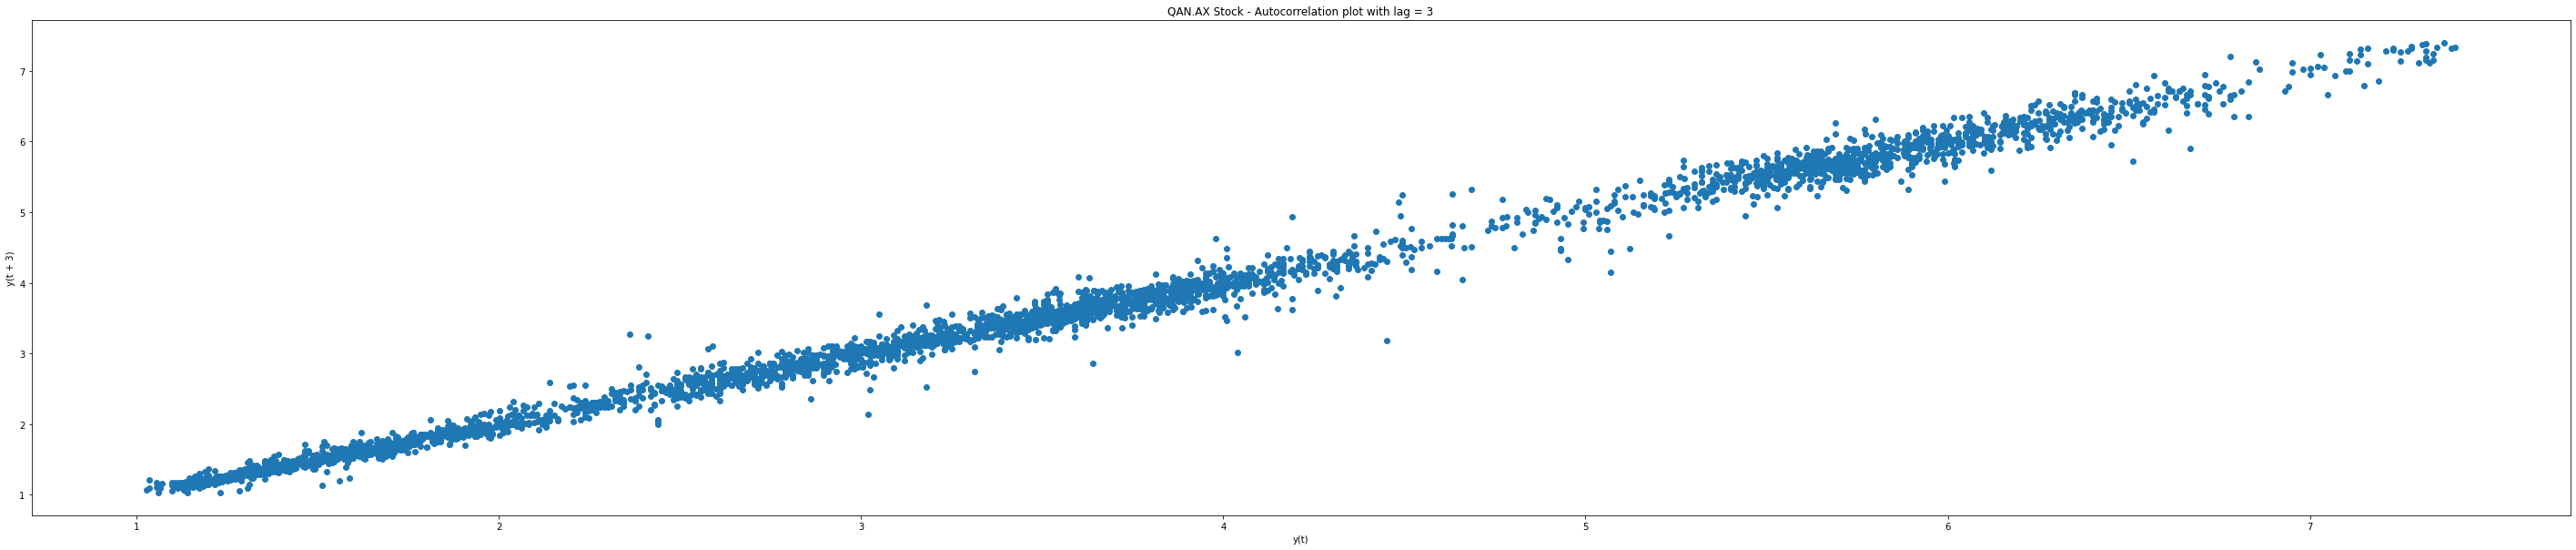

In [3]:
# Display Close data in scatter plot
plt.figure(figsize=(50, 10))
lag_plot(df['Close'], lag=3)
plt.title('QAN.AX Stock - Autocorrelation plot with lag = 3')
plt.show()

In [4]:
number_of_rows= df.shape[0]

**Generate the time series diagram for all values of column 'Close' in dataframe df**

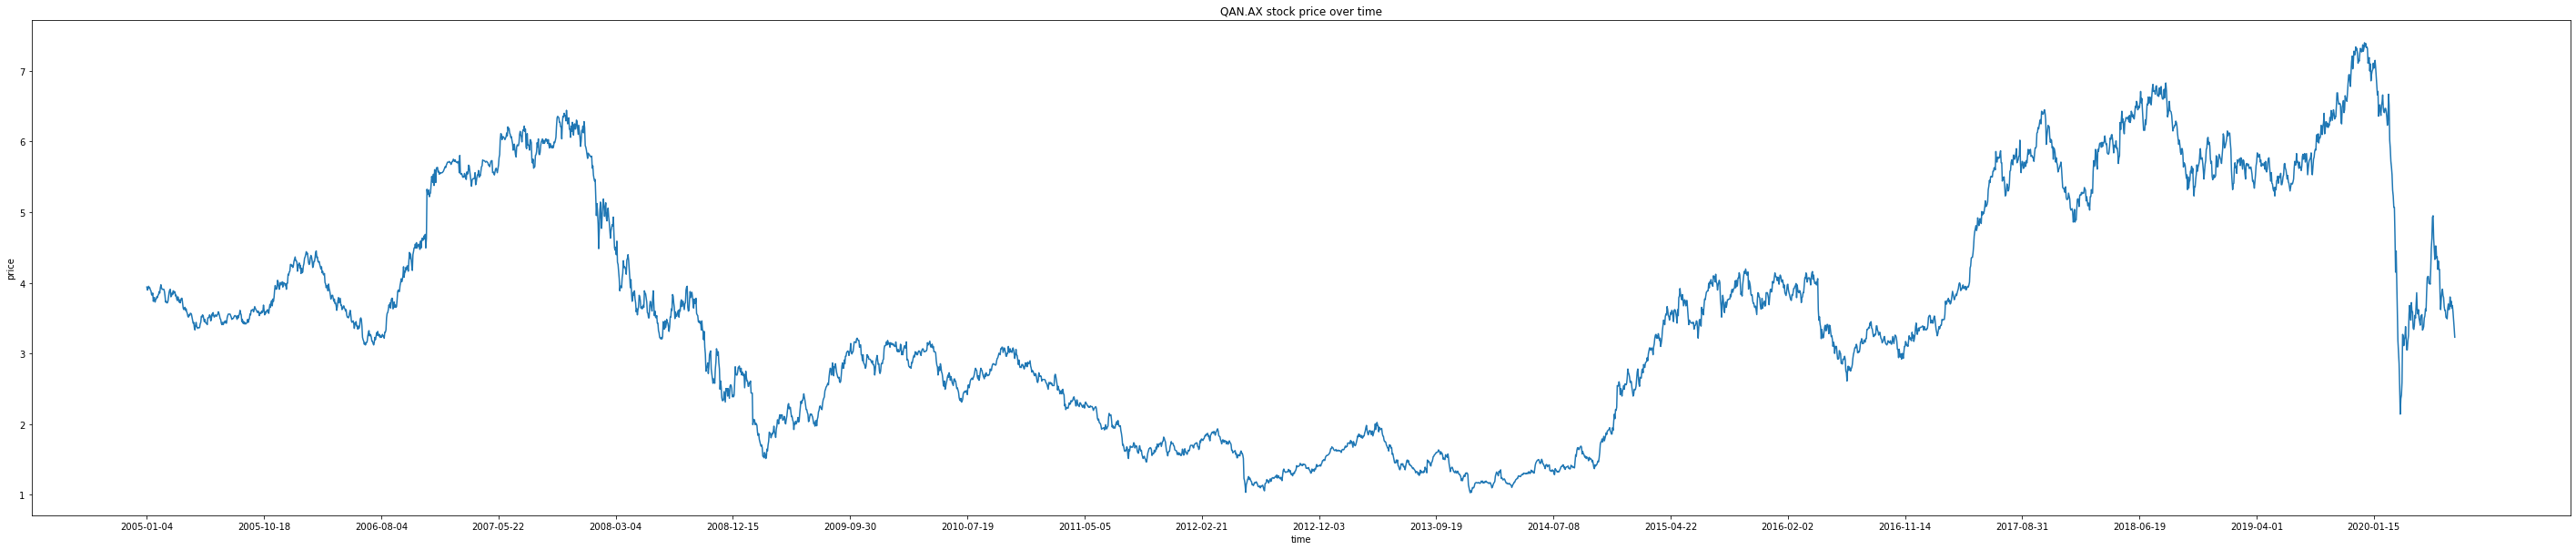

In [5]:
#Display Close data in y-axis and Date in x-axis 
plt.figure(figsize=(50, 10))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,number_of_rows, 200), df['Date'][0:number_of_rows:200])
plt.title("QAN.AX stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

**In order to apply ARIMA model, we need to see whether the data is stationary**

**series** represents the 'Close' data


**difference_series** represents the difference of the 'Close' data


**diff2** represents the second difference of the 'Close' data 

In [6]:
series = df['Close']
difference_series = series.diff() 
difference_series = difference_series.dropna()
diff2 = difference_series.diff().dropna()

**Generates Plot for 'serie'**

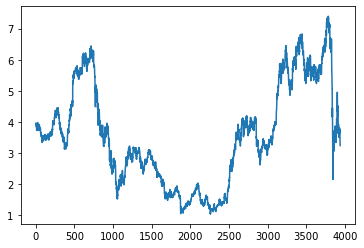

In [7]:
series.plot()
pyplot.show()

**Generate Plot for difference_series**

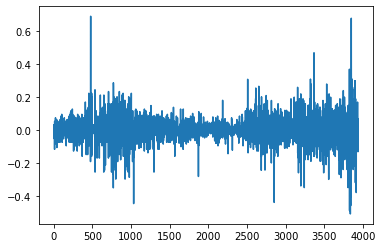

In [8]:
difference_series 
difference_series.plot()
pyplot.show()


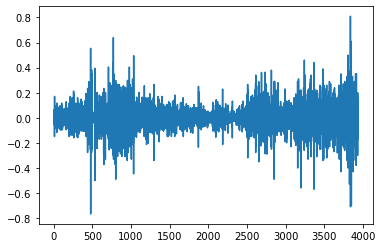

In [9]:
#Generates Plot for diff2
diff2.plot()
pyplot.show()

**Generate Histogram Plot for 'series'**

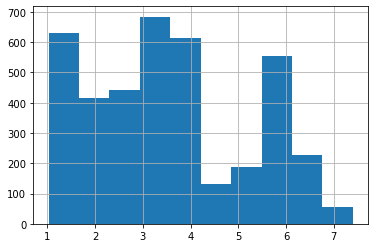

In [10]:
series.hist()
pyplot.show()

**Generate Histogram Plot for difference_series**

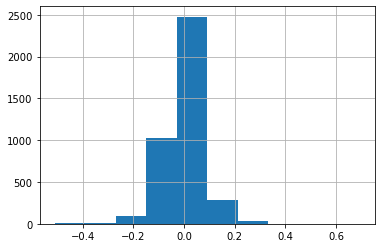

In [11]:
difference_series
difference_series.hist()
pyplot.show()

**Generate Histogram Plot for diff2**

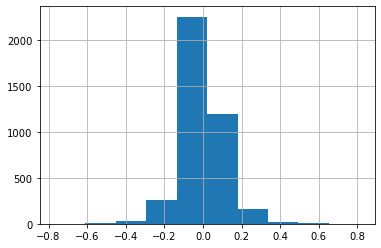

In [12]:
diff2.hist()
pyplot.show()


**Generate the mean of series**

In [13]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
meanX1, meanX2 = X1.mean(), X2.mean()
varX1, varX2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (meanX1, meanX2))
print('variance1=%f, variance2=%f' % (varX1, varX2))

mean1=3.306240, mean2=3.830207
variance1=1.836180, variance2=3.359979


**Generate the mean of difference_series**

In [14]:
Y = difference_series.values
split = round(len(Y) / 2)
Y1, Y2 = Y[0:split], Y[split:]
meanY1, meanY2 = Y1.mean(), Y2.mean()
varY1, varY2 = Y1.var(), Y2.var()
print('mean1=%f, mean2=%f' % (meanY1, meanY2))
print('variance1=%f, variance2=%f' % (varY1, varY2))

mean1=-0.001276, mean2=0.000916
variance1=0.004563, variance2=0.007230


**Generate the mean of diff2**

In [15]:
Z = diff2.values
split = round(len(Y) / 2)
Z1, Z2 = Z[0:split], Z[split:]
meanZ1, meanZ2 = Z1.mean(), Z2.mean()
varZ1, varZ2 = Z1.var(), Z2.var()
print('mean1=%f, mean2=%f' % (meanZ1, meanZ2))
print('variance1=%f, variance2=%f' % (varZ1, varZ2))

mean1=0.000016, mean2=-0.000061
variance1=0.009514, variance2=0.013776


**Visualize pacf and acf for 'X'**

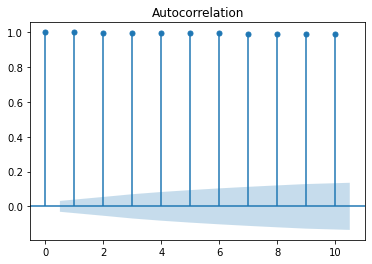

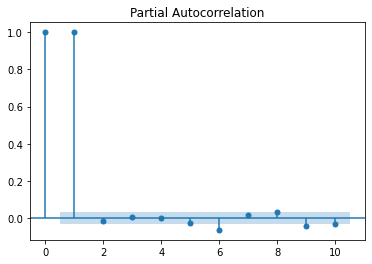

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Decide the third number
acf_plot= plot_acf(X, lags=10)
# Decide the first number
pacf_plot= plot_pacf(X, lags=10)

**Visualize pacf and acf for 'Y'**

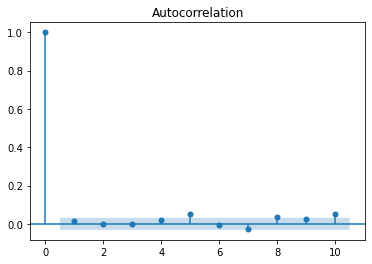

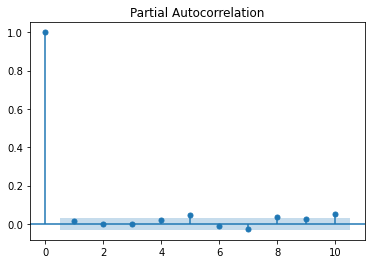

In [17]:
#Visualize pacf and acf
# Decide the third number
acf_plot= plot_acf(Y, lags=10)
# Decide the first number
pacf_plot= plot_pacf(Y, lags=10)

**Visualize pacf and acf for 'Z'**

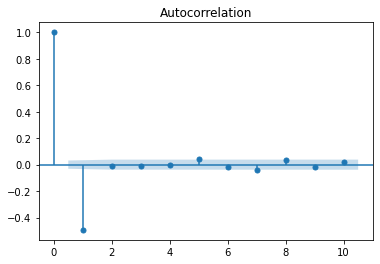

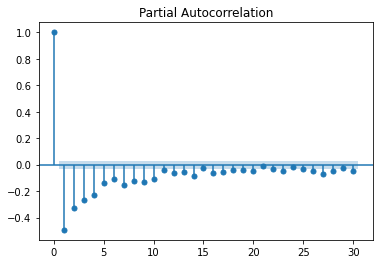

In [18]:
#Visualize pacf and acf
# Decide the third number
acf_plot= plot_acf(Z, lags=10)
# Decide the first number
pacf_plot= plot_pacf(Z, lags=30)

**Splitting data into training set and testing set**

In [19]:
#Split the Close values into training set and testing set
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

**Single training**

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

**Code Explain**
* The data will be splited into 'train_data' (training set) and 'test_data' (testing set) with ratio 7:3. 
* Then, convert 'train_data' in dataframe format into 'training_data' in numpy.array format.
* Next, Convert 'training_data' numpy.array format into 'history' in list format
* Do the same convertion on 'test_data'
* Create a variable 'model_predictions' for storing all predicted values
* Create a variable 'N_test_observations' that is equal to the length of 'test_data'
* After the model is trained by the 'history', the model will start to forcast the next day value. 
* After the prediction, the predicted value will be stored in 'model_predictions' and 'history' will append the true value on the predicted day.
* After, 'history' has been updated, the model will be trained again to predict next day repetitively until finshing predicting all test_data

#### Impletement model
Since we choosed ARIMA(1,1,0) and ARIMA(1,2,0), we are going to apply ARIMA(1,1,0) and (1,2,0) on QAN.AX as well

**Example on ARIMA(1,1,0)**

In [20]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
#Print the accuracy of the model
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_data, model_predictions))
print('R2: ', metrics.r2_score(test_data, model_predictions))

D:\program\Anaconda\envs\XieyuanH\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\program\Anaconda\envs\XieyuanH\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 0.010247909709230797
Mean Absolute Error: 0.0715722970809497
R2:  0.9936880223957543


**Display on the graph for training set and testing set in QAN.AX example under ARIMA(1,1,0)**

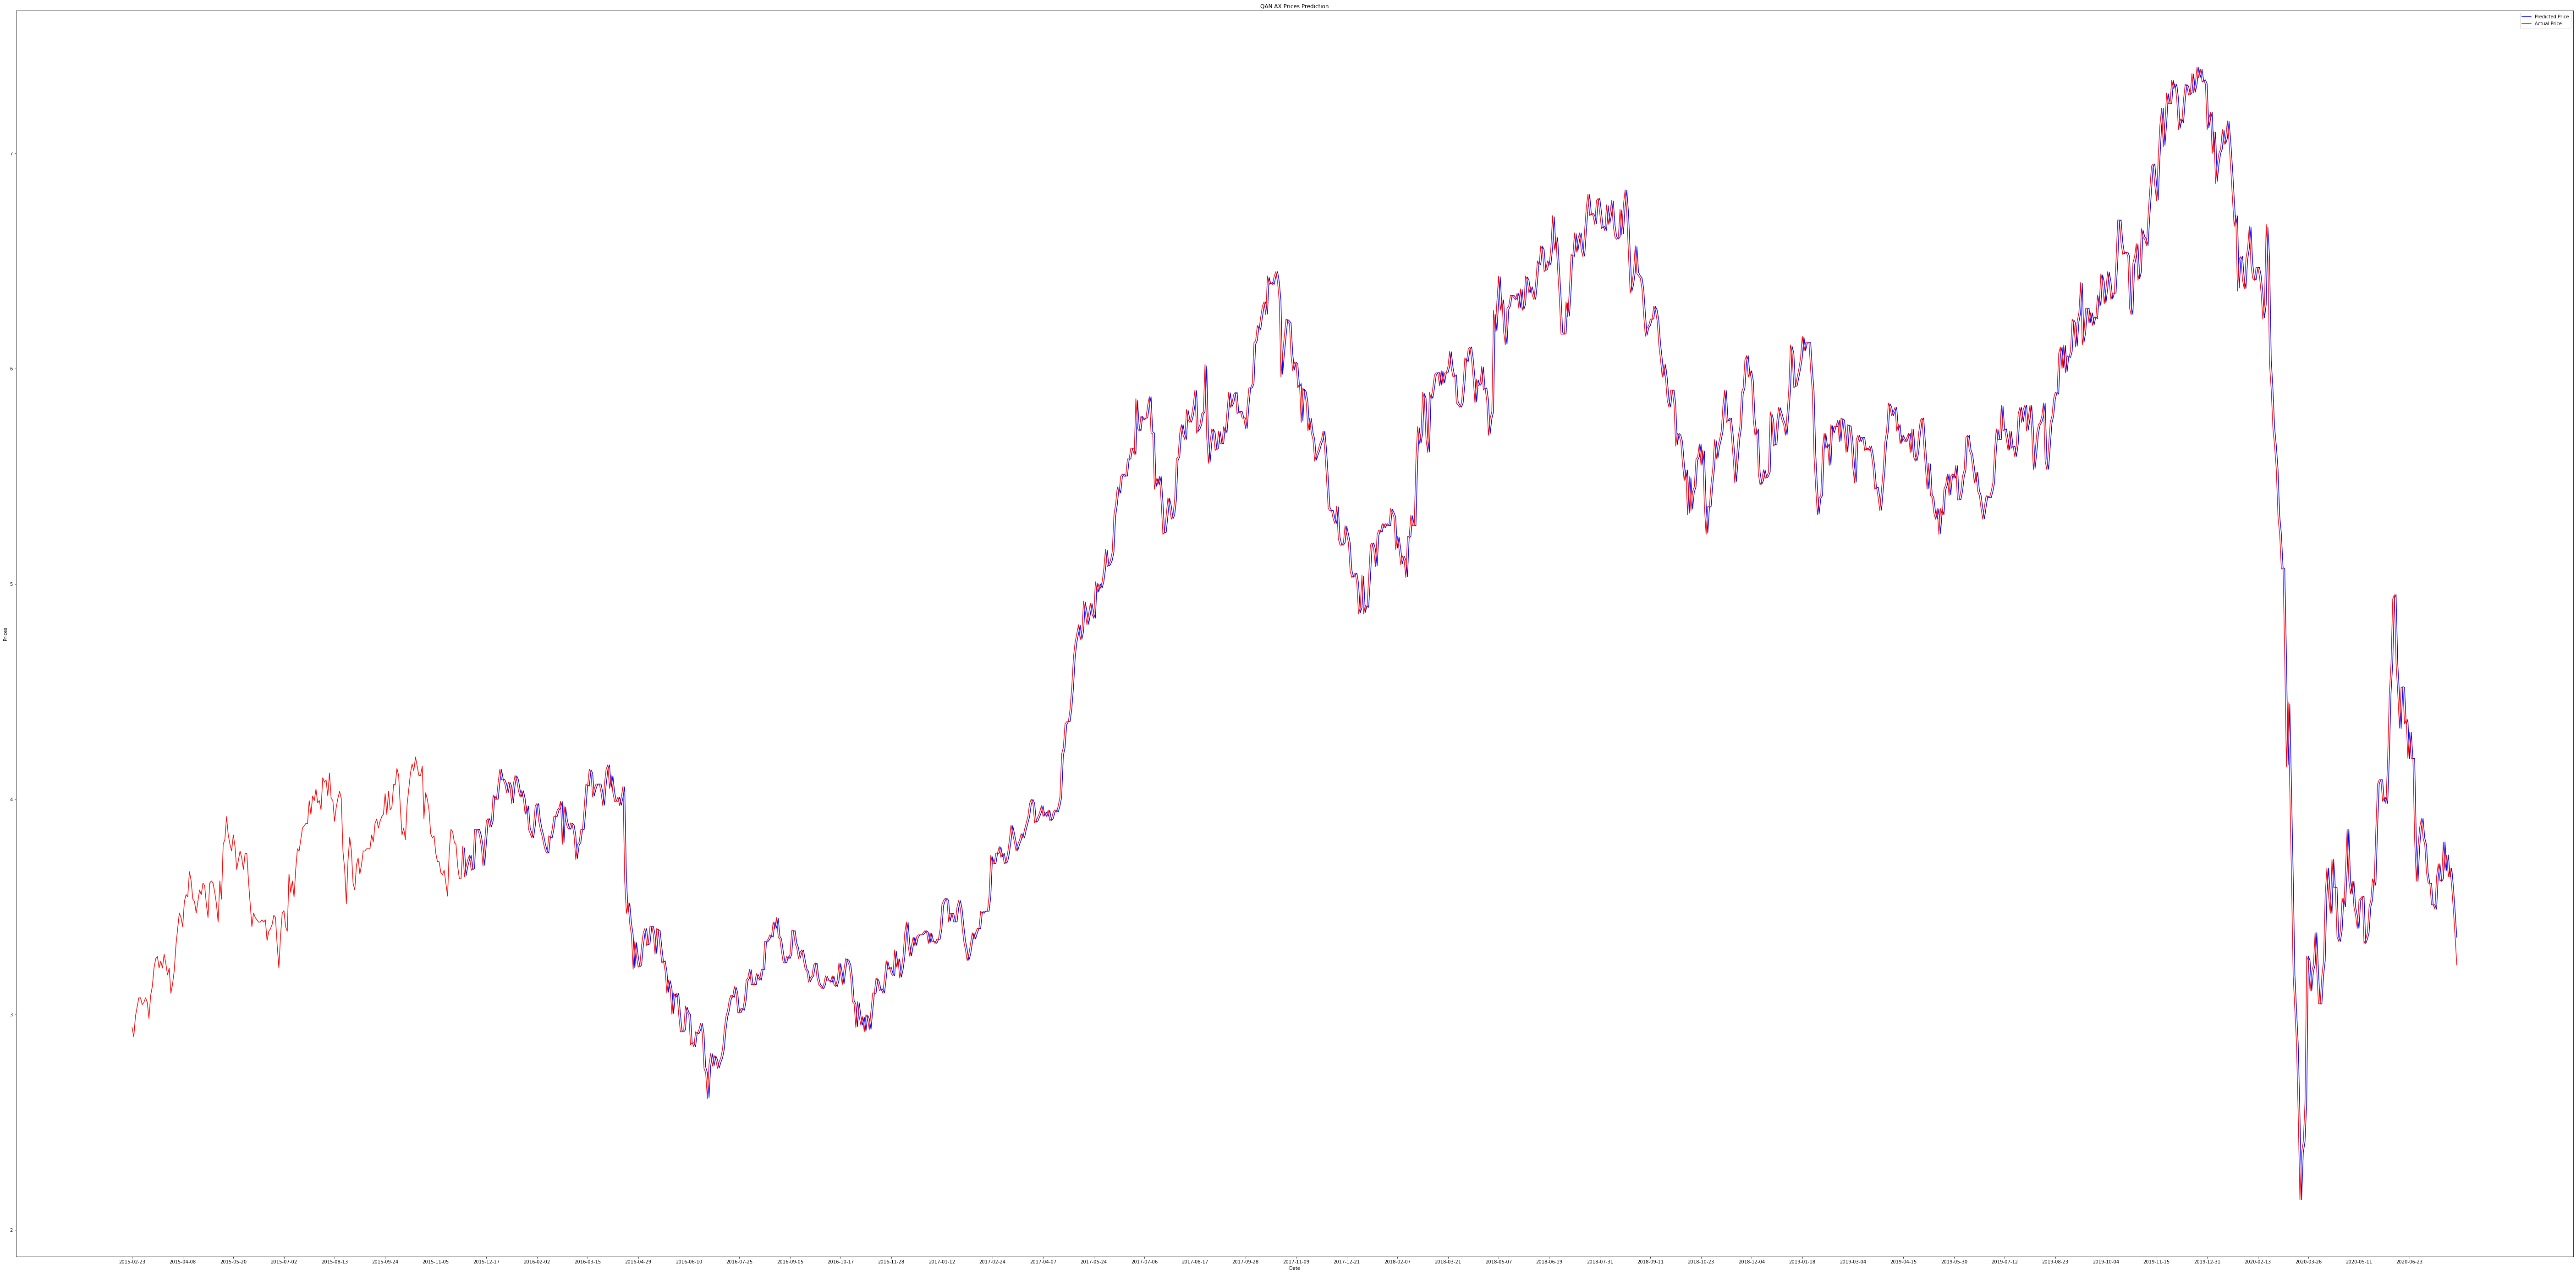

In [21]:
#Display the prediction and true value in graph
plt.figure(figsize=(100, 50))
test_set_range = df[int(len(df)*0.7):].index
all_range= df.index
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(all_range[round(0.65*len(all_range)):], df['Close'][round(0.65*len(all_range)):].values, color='red', label='Actual Price')
plt.title('QAN.AX Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(round(0.65*len(all_range)),number_of_rows,30), df.Date[round(0.65*len(all_range)):number_of_rows:30])
plt.legend()
plt.show()

**Train the ARIMA model (1,2,0)**

In [22]:
#Split the Close values into training set and testing set
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions2 = []
N_test_observations = len(test_data)

# The for loop basically let the model train from history variable first, then predict for the test[timepoint] value. The prediction will be stored in model_predictions
# After store the prediction value, we get the true value of the prediction time period from test_data
# Finally, we put the true value into history variable to update the model and then predict the test[timepoint+1].
for time_point in range(N_test_observations):
    model2 = ARIMA(history, order=(1,2,0))
    model_fit2 = model2.fit(disp=0)
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    model_predictions2.append(yhat2)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
#Print the accuracy of the model
MSE_error = mean_squared_error(test_data, model_predictions2)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_data, model_predictions2))
print('R2: ', metrics.r2_score(test_data, model_predictions2))

D:\program\Anaconda\envs\XieyuanH\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\program\Anaconda\envs\XieyuanH\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 0.014919370369674957
Mean Absolute Error: 0.08879259840869008
R2:  0.9908107375733404


**Display on the graph for training set and testing set in QAN.AX example under ARIMA(1,2,0)**

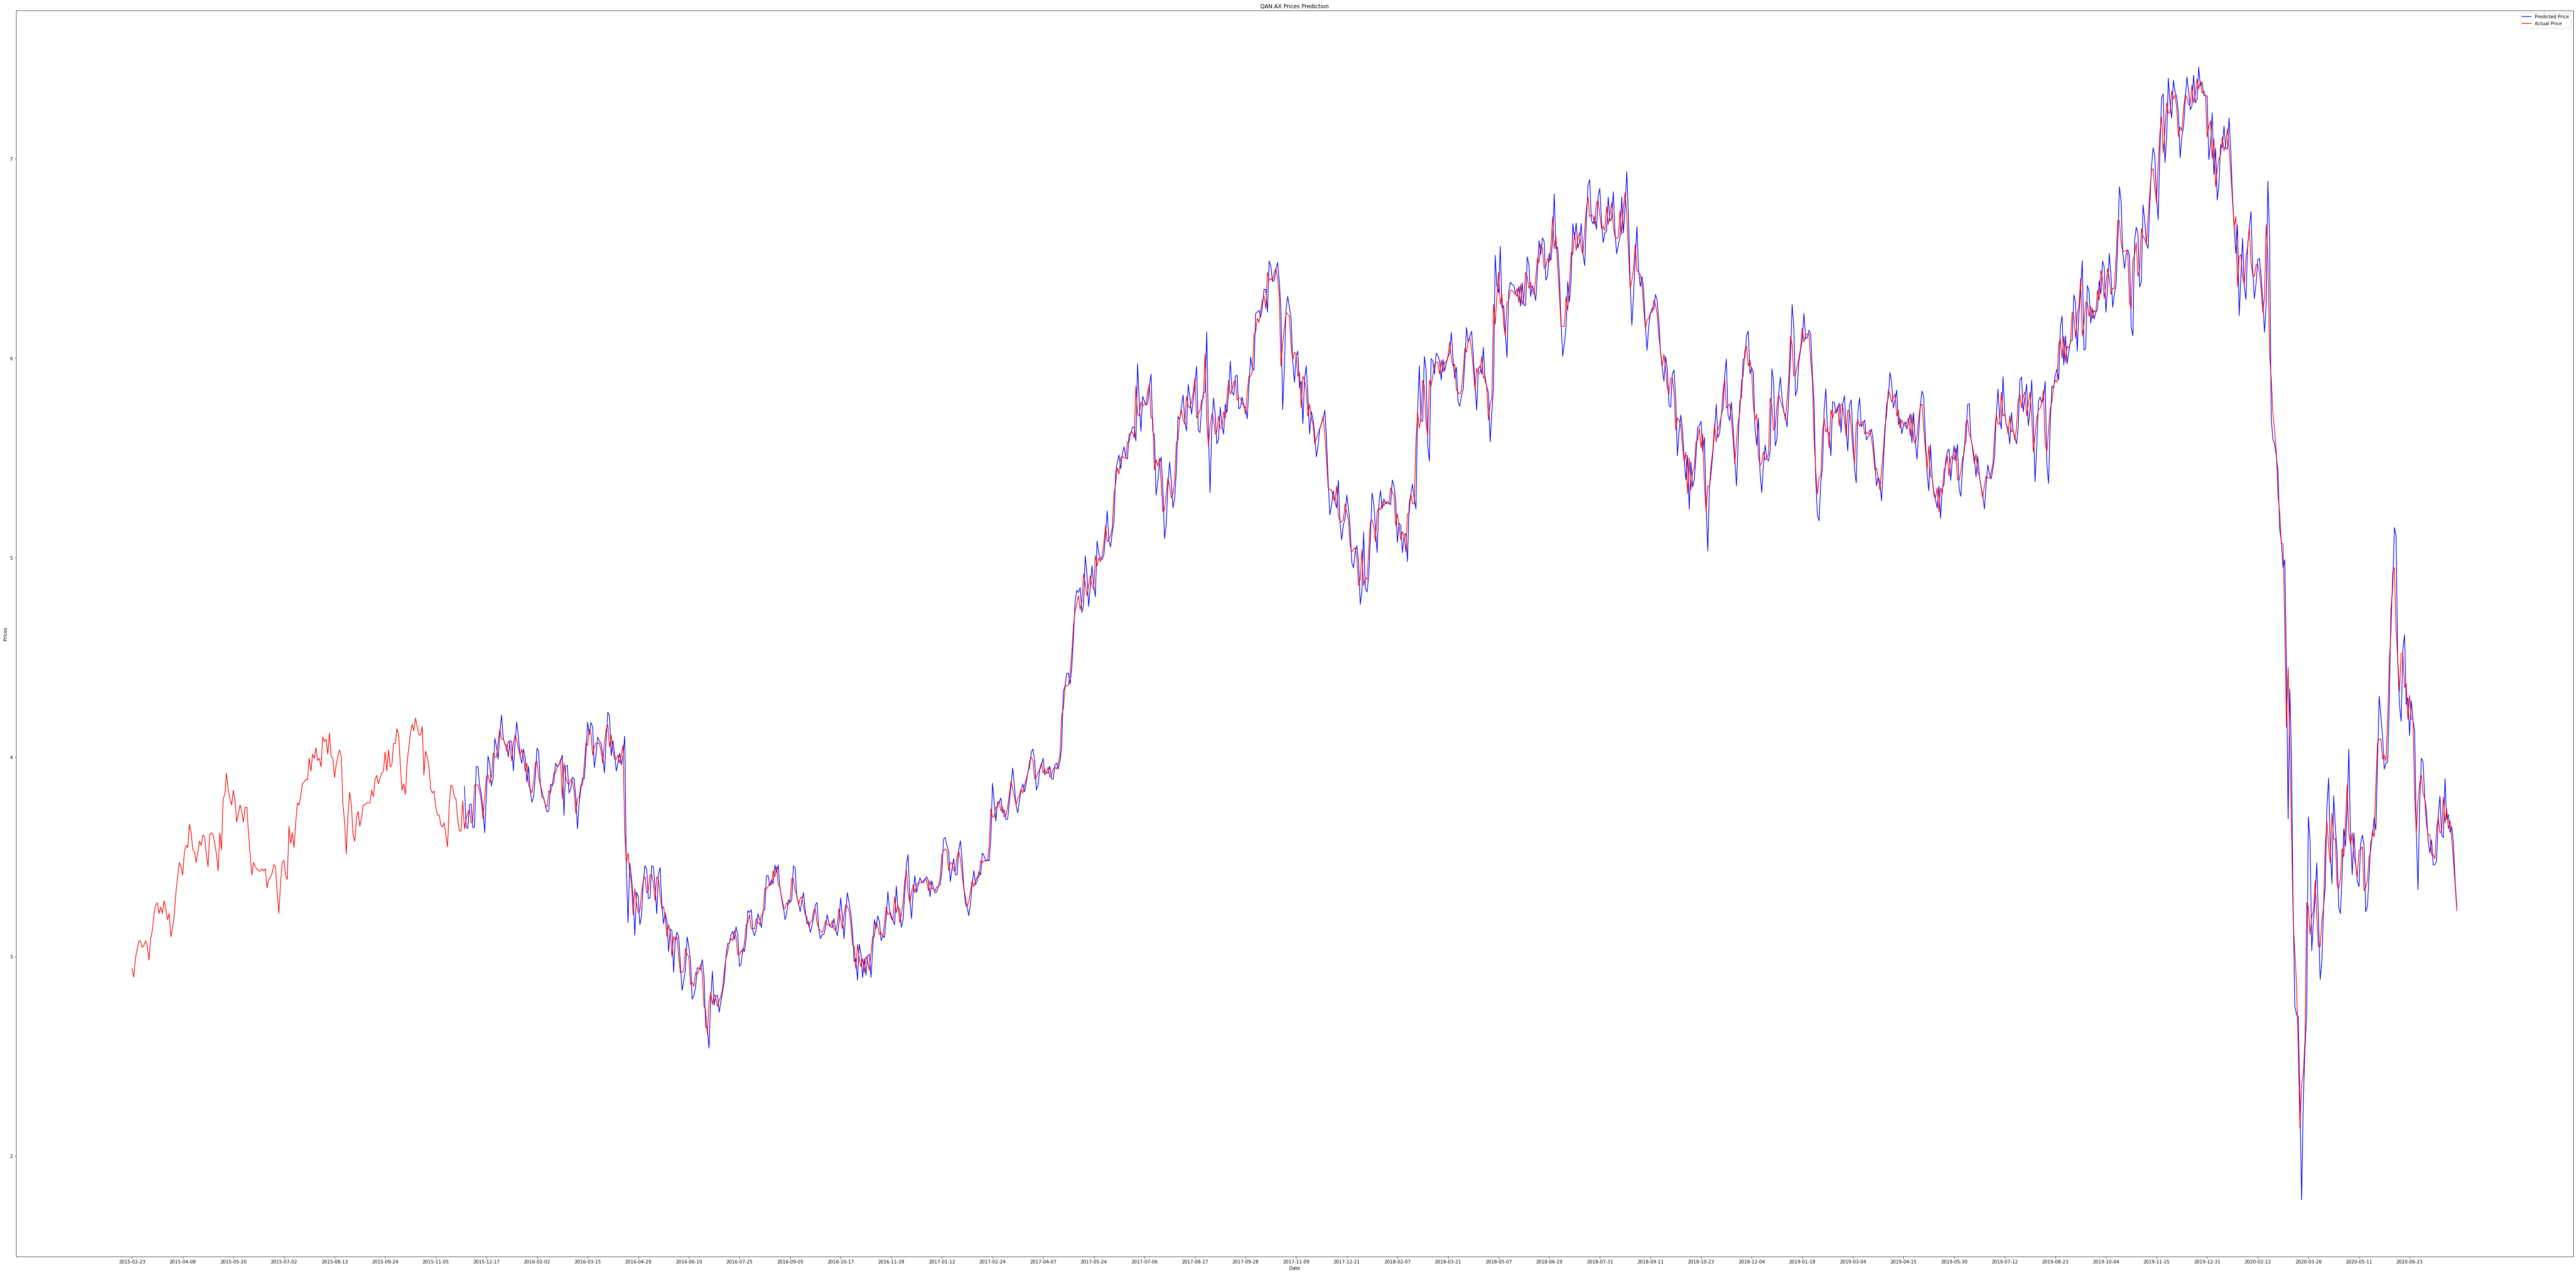

In [23]:
#Display the prediction and true value in graph
plt.figure(figsize=(100, 50))
test_set_range = df[int(len(df)*0.7):].index
all_range= df.index
plt.plot(test_set_range, model_predictions2, color='blue',label='Predicted Price')
plt.plot(all_range[round(0.65*len(all_range)):], df['Close'][round(0.65*len(all_range)):].values, color='red', label='Actual Price')
plt.title('QAN.AX Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(round(0.65*len(all_range)),number_of_rows,30), df.Date[round(0.65*len(all_range)):number_of_rows:30])
plt.legend()
plt.show()

### Disadvantage
The model is to utilise the previous price values in dataset to predict the future price values, in another words, it is to use the previous results to predict the future results. It ignores all causes of the price change such as news and psycological influences, which results in a significant weakness that it probably will produce wrong predictions if there is a big news released and the confidence of the market changes. However, the model theoratically performs well in some certain scenarios that are under frutuating period after a big price change or some specific stocks that are not popular.



# Forcasting 5 days in the future





#### Create the number of days we need to predict
#### Create a dataframe for ARIMA(1,1,0) to make prediction


In [24]:
days=5
future= pd.read_csv('QAN.AX.csv')
future= future[['Date','Close']]
future= future.dropna()
Predict_1 = {'Date':'2020-08-03', 'Close': np.NAN}
Predict_2 = {'Date':'2020-08-04', 'Close': np.NAN}
Predict_3 = {'Date':'2020-08-05', 'Close': np.NAN}
Predict_4 = {'Date':'2020-08-06', 'Close': np.NAN}
Predict_5 = {'Date':'2020-08-07', 'Close': np.NAN}
future = future.append([Predict_1,Predict_2,Predict_3,Predict_4,Predict_5], ignore_index=True)
future_model1 = future

### ARIMA(1,1,0) Forcasting
**Split the data set by train_data and predict_data**
* train_data is for fitting the model
* predict_data represents the predictions we want which is 5 days
* process the data in order to feed ARIMA(1,1,0)

In [25]:
#Split the Close values into training set and testing set
train_data, predict_data = future_model1[0:int(len(future)-days)], future_model1[int(len(future)-days):]
training_data = train_data['Close'].values
predict_data = predict_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(predict_data)



**Display the data we need to predict before feeding the model**

In [26]:
predict_data

array([nan, nan, nan, nan, nan])

**Run the model ARIMA(1,1,0)**

In [27]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = yhat
    history.append(true_test_value)

D:\program\Anaconda\envs\XieyuanH\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**Display the results of the predictions**

In [28]:
model_predictions

[array([3.22816846]),
 array([3.22796653]),
 array([3.22778531]),
 array([3.22760436]),
 array([3.22742341])]

**Replace the NAN values in the dataframe 'future_model1' by the predicted value**

In [29]:
future_model1.loc[future_model1['Close'].isnull(), 'Close'] = model_predictions

In [30]:
future_model1[-15:]

,Date,Close
3929,2020-07-20,3.630000
3930,2020-07-21,3.800000
3931,2020-07-22,3.670000
3932,2020-07-23,3.740000
3933,2020-07-24,3.640000
3934,2020-07-27,3.680000
3935,2020-07-28,3.590000
3936,2020-07-29,3.480000
3937,2020-07-30,3.360000
3938,2020-07-31,3.230000


### Visualize the prediction of ARIMA(1,1,0)

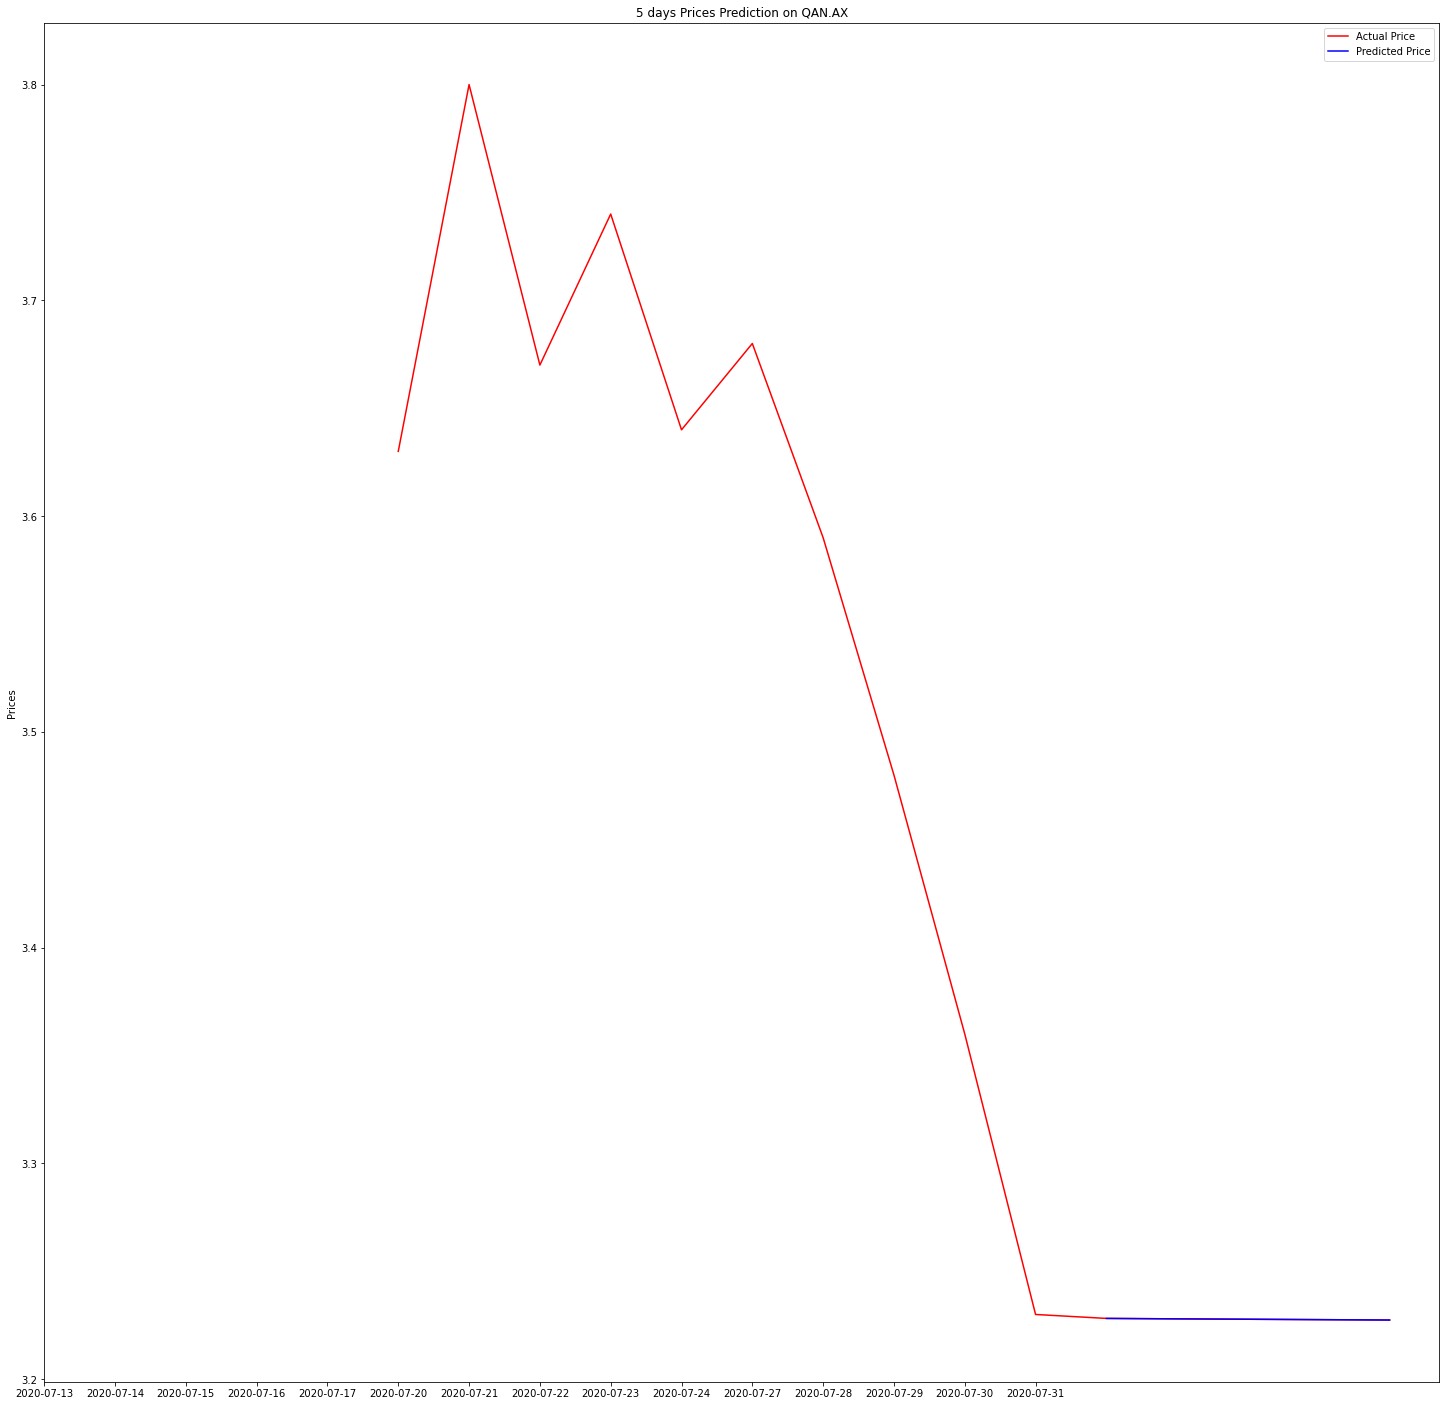

In [31]:
plt.figure(figsize=(25, 25))
predict_set_range = future_model1[-days:].index
all_range= future_model1[-15:].index


plt.plot(all_range, future_model1['Close'][-15:].values, color='red', label='Actual Price')
plt.plot(predict_set_range, model_predictions, color='blue',label='Predicted Price')
plt.title('5 days Prices Prediction on QAN.AX')
plt.ylabel('Prices')
plt.xticks(np.arange(number_of_rows-len(all_range),number_of_rows,1), df.Date[number_of_rows-len(all_range):number_of_rows:1])
plt.legend()
plt.show()


### ARIMA(1,2,0) Forcasting
**Split the data set by train_data and predict_data**
* train_data is for fitting the model
* predict_data represents the predictions we want which is 5 days
* process the data in order to feed ARIMA(1,1,0)

In [32]:
days=5
future= pd.read_csv('QAN.AX.csv')
future= future[['Date','Close']]
future= future.dropna()
Predict_1 = {'Date':'2020-08-03', 'Close': np.NAN}
Predict_2 = {'Date':'2020-08-04', 'Close': np.NAN}
Predict_3 = {'Date':'2020-08-05', 'Close': np.NAN}
Predict_4 = {'Date':'2020-08-06', 'Close': np.NAN}
Predict_5 = {'Date':'2020-08-07', 'Close': np.NAN}
future = future.append([Predict_1,Predict_2,Predict_3,Predict_4,Predict_5], ignore_index=True)
future_model2 = future

**Display the data we need to predict before feeding the model**

In [33]:
#Split the Close values into training set and testing set
train_data, predict_data = future_model2[0:int(len(future)-days)], future_model2[int(len(future)-days):]
training_data = train_data['Close'].values
predict_data = predict_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(predict_data)


In [34]:
future_model2

,Date,Close
0,2005-01-04,3.94036
1,2005-01-05,3.89776
2,2005-01-06,3.91906
3,2005-01-07,3.95101
4,2005-01-10,3.92971
...,...,...
3939,2020-08-03,NaN
3940,2020-08-04,NaN
3941,2020-08-05,NaN
3942,2020-08-06,NaN


**Run the model ARIMA(1,2,0)**

In [35]:
for time_point in range(N_test_observations):
    model2 = ARIMA(history, order=(1,2,0))
    model_fit2 = model2.fit(disp=0)
    output = model_fit2.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = yhat
    history.append(true_test_value)

D:\program\Anaconda\envs\XieyuanH\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**Display the results of the predictions**

In [36]:
model_predictions

[array([3.1048886]),
 array([2.97732795]),
 array([2.8509345]),
 array([2.7239259]),
 array([2.59718058])]

**Replace the NAN values in the dataframe 'future_model1' by the predicted value**

In [37]:
future_model2.loc[future_model2['Close'].isnull(), 'Close'] = model_predictions
future_model1[-15:]

,Date,Close
3929,2020-07-20,3.630000
3930,2020-07-21,3.800000
3931,2020-07-22,3.670000
3932,2020-07-23,3.740000
3933,2020-07-24,3.640000
3934,2020-07-27,3.680000
3935,2020-07-28,3.590000
3936,2020-07-29,3.480000
3937,2020-07-30,3.360000
3938,2020-07-31,3.230000


### Visualize the prediction of ARIMA(1,2,0)

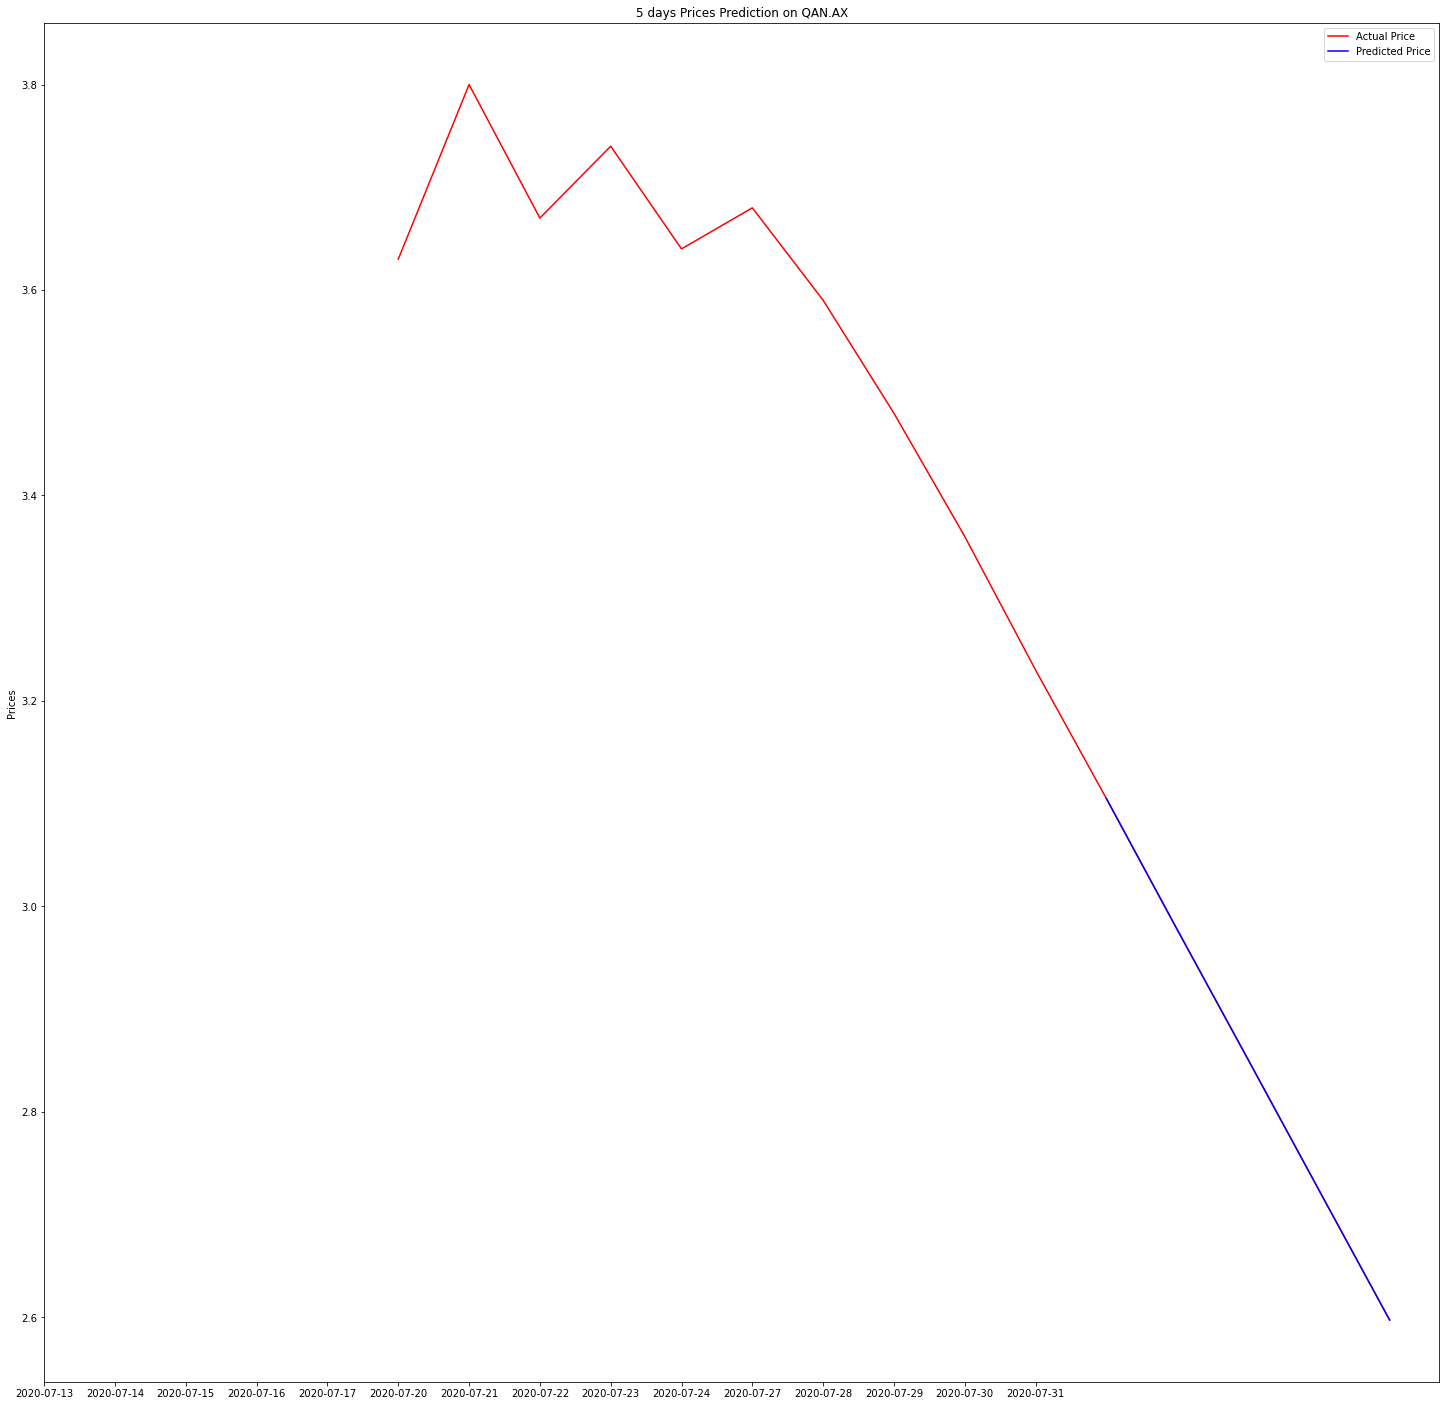

In [38]:
plt.figure(figsize=(25, 25))
predict_set_range = future_model2[-days:].index
all_range= future_model1[-15:].index


plt.plot(all_range, future_model2['Close'][-15:].values, color='red', label='Actual Price')
plt.plot(predict_set_range, model_predictions, color='blue',label='Predicted Price')
plt.title('5 days Prices Prediction on QAN.AX')
plt.ylabel('Prices')
plt.xticks(np.arange(number_of_rows-len(all_range),number_of_rows,1), df.Date[number_of_rows-len(all_range):number_of_rows:1])
plt.legend()
plt.show()